# **LAB:8 Implement LeNet for image classification**

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [ ]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# Building the Lenet Model Architecture
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))

model.add(Dense(84, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 37s 72ms/step - loss: 0.3322 - accuracy: 0.9029 - val_loss: 0.1054 - val_accuracy: 0.9687
Epoch 2/20
469/469 [==============================] - 26s 56ms/step - loss: 0.0913 - accuracy: 0.9720 - val_loss: 0.0631 - val_accuracy: 0.9801
Epoch 3/20
469/469 [==============================] - 27s 57ms/step - loss: 0.0645 - accuracy: 0.9797 - val_loss: 0.0480 - val_accuracy: 0.9837
Epoch 4/20
469/469 [==============================] - 29s 62ms/step - loss: 0.0515 - accuracy: 0.9837 - val_loss: 0.0463 - val_accuracy: 0.9855
Epoch 5/20
469/469 [==============================] - 27s 57ms/step - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.0492 - val_accuracy: 0.9843
Epoch 6/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0376 - val_accuracy: 0.9890
Epoch 7/20
469/469 [==============================] - 26s 56ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0351 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100)

313/313 [==============================] - 4s 12ms/step - loss: 0.0337 - accuracy: 0.9910
Test Loss: 0.03371986374258995
Test accuracy: 99.09999966621399


In [ ]:
import matplotlib.pyplot as plt

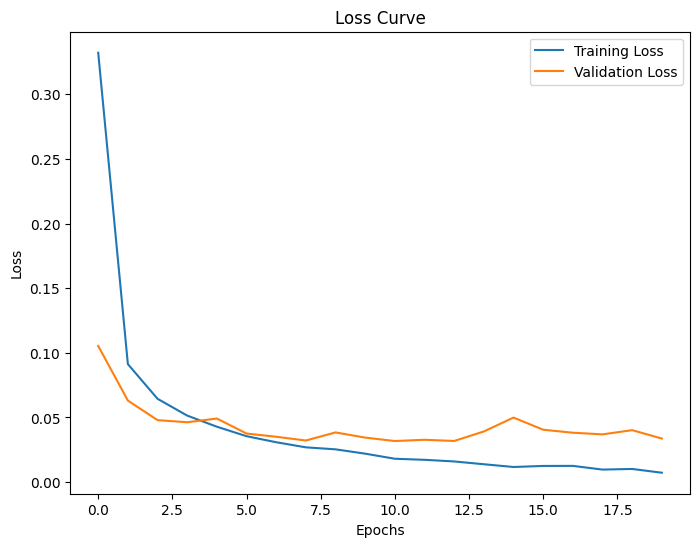

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()